INTG- [IASBS THEORETICAL NEUROSCIENCE GROUP](https://www.iasbs.ac.ir/~valizade/)

### [Single neuron](http://www.nest-simulator.org/part-1-neurons-and-simple-neural-networks/)

In this handout we cover the first steps in using PyNEST to simulate neuronal networks.

-  create a single neuron, multimeter and spikedetector
-  connect the multimeter and spikedetector to the neuron
-  plot voltage and spike events over time

I_e =  (0.0,)
V_reset and V_the are  ((-70.0, -55.0),)


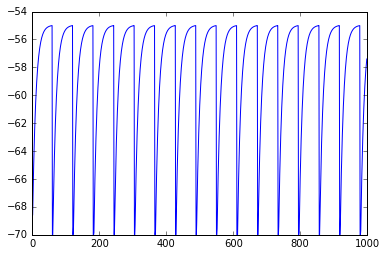

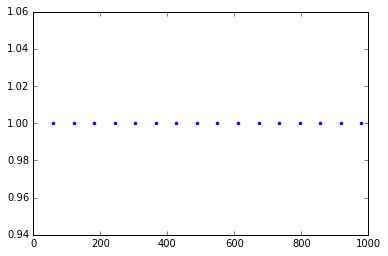

In [1]:
import nest
import pylab as pl #to plot figures
# just for jupyter notebooks to put figures inside the document
% matplotlib inline 

# ResetKernel() gets rid of all nodes you have created, 
# any customised models you created, and resets 
# the internal clock to 0.
# use it at the begining of each seperate simulation.
nest.ResetKernel()

# create a neuron of type iaf_psc_alpha
neuron = nest.Create('iaf_psc_alpha')

# print default values of parameters
print 'I_e = ', nest.GetStatus(neuron, "I_e")
print 'V_reset and V_the are ', nest.GetStatus(neuron, ["V_reset", "V_th"])

# stimulate the neuron with a constant current
nest.SetStatus(neuron,{'I_e':376.0})

# create a multimeter, a device we can use to record the membrane voltage of a neuron over time.
multimeter = nest.Create("multimeter")

# We set its property withtime such that it will also 
# record the points in time at which it samples the 
# membrane voltage. The property record_from expects
# a list of the names of the variables we would like to record.
nest.SetStatus(multimeter,{"withtime":True,
                           "record_from":["V_m"]})

# create a spikedetector, another device that records the spiking 
# events produced by a neuron. 
# withgid indicates whether the spike detector is to 
# record the source id from which it received the event
# (i.e. the id of our neuron).                                   
spikedetector = nest.Create("spike_detector",
                            params={"withgid": True,
                                   "withtime": True})

# Connecting node to multimeter and spikedetector with default connections
# the order of arguments is important
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

# start the simulation
nest.Simulate(1000.0) # time in ms

# Extracting and plotting data from devices
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
pl.figure(1)
pl.plot(ts,Vms)

# print nest.GetStatus(spikedetector)[0].keys()
# print nest.GetStatus(spikedetector)[0]['events']
dSD = nest.GetStatus(spikedetector,keys='events')[0]
evs = dSD['senders']
ts = dSD["times"]
pl.figure(2)
pl.plot(ts,evs,'.')
pl.show()

### Add extra neuron
-  record from a spiking and a silent neuron with a single multileter
-  neurons are not coupled
-  plot the voltage versus time

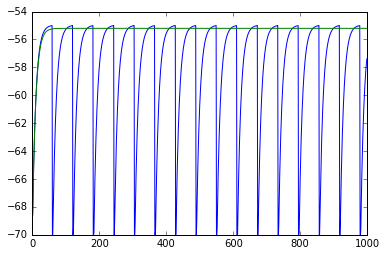

In [2]:
% matplotlib inline
import nest
import pylab as pl
from sys import exit

nest.ResetKernel()

# the first neuron
neuron = nest.Create('iaf_psc_alpha')
nest.SetStatus(neuron,{'I_e':376.0})
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter,{"withtime":True, 
                           "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector",
                            params={"withgid": True,
                                   "withtime": True})
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)


# Create an extra neuron
neuron2 = nest.Create("iaf_psc_alpha")

# add constant current to neuron but less the sufficient to make spike
nest.SetStatus(neuron2,{"I_e":370.0}) 

# connect this newly created neuron to the multimeter
# we use the same multimeter and spikedetector to record from both neurons
# Connect(pre, post, conn_spec, syn_spec)
# http://www.nest-simulator.org/connection-management/
nest.Connect(multimeter, neuron2)
nest.Connect(neuron2, spikedetector)


nest.Simulate(1000.0) # in ms

# plotting the results
# Run the simulation and plot the results, 
# they will look incorrect. To fix this you must 
# plot the two neuron traces separately
# the seperation is carry out with slicing the arrays
# [::2] get the even indices
# [1::2] get the odd indices 
# numpy slicing: [start:end:step]

dmm = nest.GetStatus(multimeter)[0]
Vms1 = dmm["events"]["V_m"][::2]
ts1 = dmm["events"]["times"][::2]
pl.plot(ts1,Vms1)
Vms2 = dmm["events"]["V_m"][1::2]
ts2 = dmm['events']['times'][1::2]
pl.plot(ts2,Vms2)
pl.show()
# ------------------------------------------------------- #
# uncomment these lines to see the wrong results
# Vms1 = dmm["events"]["V_m"]
# ts1 = dmm["events"]["times"]
# pl.plot(ts1,Vms1)
# Vms2 = dmm["events"]["V_m"]
# ts2 = dmm['events']['times']
# pl.plot(ts2,Vms2)
# pl.show()


### Connecting nodes with specific connections
-  single neuron receives 2 Poisson spike trains
-  one excitatory and the other inhibitory
-  plot the voltage and spike events

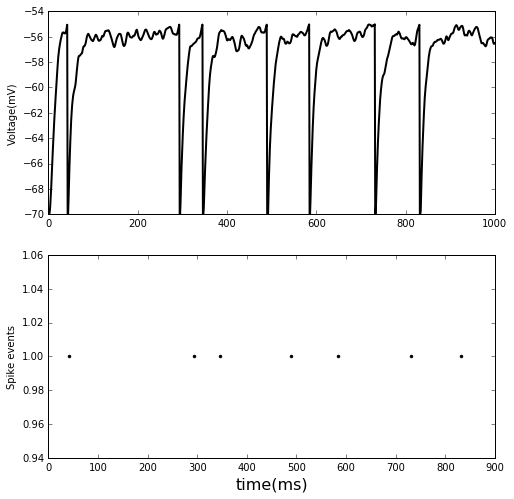

In [3]:
% matplotlib inline
import nest
import pylab as pl
nest.ResetKernel()
neuron = nest.Create('iaf_psc_alpha')
nest.SetStatus(neuron,{'I_e':376.0})
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter,{"withtime":True,
                           "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector",
                            params={"withgid": True,
                                   "withtime": True})
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

# ------------------------------------------------------- #
# Connecting nodes with specific connections
# neuron receives 2 Poisson spike trains,
# one excitatory and the other inhibitory

noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")
nest.SetStatus(noise_ex, {"rate": 80000.0}) # in [Hz]
nest.SetStatus(noise_in, {"rate": 15000.0})

# constant input current should be set to 0:
nest.SetStatus(neuron, {"I_e": 0.0})

# excitatory postsynaptic current of 1.2pA amplitude
syn_dict_ex = {"weight": 1.2} 

# inhibitory postsynaptic current of -2pA amplitude
syn_dict_in = {"weight": -2.0}

# The synaptic weights can be defined in a dictionary,
# which is passed to the Connect function using the 
# keyword syn_spec (synapse specifications).
nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)

nest.Simulate(1000.0) # in ms

# plot the results
dmm = nest.GetStatus(multimeter)[0]
Vms1 = dmm["events"]["V_m"]
ts1 = dmm["events"]["times"]

fig, ax = pl.subplots(2, figsize=(8,8))
ax[0].plot(ts1, Vms1, c='k', lw=2)

dSD = nest.GetStatus(spikedetector, keys='events')[0]
evs = dSD['senders']
ts = dSD["times"]
ax[1].plot(ts,evs,'.', c='k')

# set labels
ax[1].set_xlabel('time(ms)', fontsize=16)
ax[0].set_ylabel('Voltage(mV)')
ax[1].set_ylabel('Spike events')
pl.show()

### two connected neurons
-  plot post synaptic voltage from neuron 1 on neuron 2

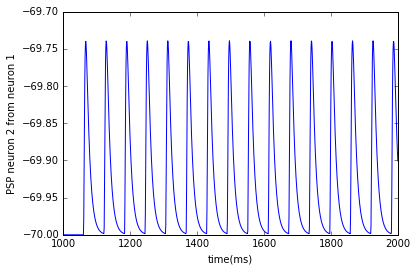

In [4]:
% matplotlib inline
import nest
import pylab as pl
neuron1 = nest.Create("iaf_psc_alpha")

# input to neuron 1
nest.SetStatus(neuron1, {"I_e": 376.0})

neuron2 = nest.Create("iaf_psc_alpha")
multimeter = nest.Create("multimeter")

nest.SetStatus(multimeter, {"withtime": True,
                            "record_from": ["V_m"]})

# connect neuron1 to neuron2
# nest.Connect(neuron1, neuron2, syn_spec={"weight": 20.0})
#  default delay is 1ms, alternative command is:
nest.Connect(neuron1,
             neuron2, syn_spec={"weight": 20, "delay": 1.0})

# input current of neuron 2 is only from PSP of neuron 1
# record the membrane potential from neuron2 
nest.Connect(multimeter, neuron2)

nest.Simulate(1000.0)  # in ms

dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

pl.plot(ts, Vms)
pl.xlabel('time(ms)')
pl.ylabel('PSP neuron 2 from neuron 1')

pl.show()


### creating parameterised populations of nodes

In [1]:

import nest
import pylab as pl
from sys import exit

nest.ResetKernel()

#the most basic way of creating a batch of identically
# parameterised neurons is to exploit the optional 
# arguments of Create():
ndict = {"I_e": 200.0, "tau_m": 20.0}
neuronpop = nest.Create("iaf_psc_alpha", 100, params=ndict)
# neuronpop is a list of all the ids of the created neurons.
# naming the neurons in population start from 1 (uncomment the next line)
# print neuronpop 

# We can also set the parameters of a neuron model before 
# creation, which allows us to define a simulation more 
# concisely in many cases
ndict = {"I_e": 200.0, "tau_m": 20.0}
# nest.SetDefaults(model, params)
nest.SetDefaults("iaf_psc_alpha",ndict)

neuronpop1 = nest.Create("iaf_psc_alpha", 100)
neuronpop2 = nest.Create("iaf_psc_alpha", 100)
neuronpop3 = nest.Create("iaf_psc_alpha", 100)

# check default values of the model
# print nest.GetStatus(neuronpop1[1:10], "I_e")
# print nest.GetDefaults('iaf_psc_alpha')['tau_m']
# print nest.GetDefaults('iaf_psc_alpha')['I_e']

# -------------------------------------------------- #
# If batches of neurons should be of the same model but using 
# different parameters, it is handy to use CopyModel
# to make a customised version of a neuron model with its own 
# default parameters. 
edict = {"I_e": 200.0, "tau_m": 20.0}
# CopyModel(existing, new, params=None)
nest.CopyModel("iaf_psc_alpha", "exc_iaf_neuron")
nest.SetDefaults("exc_iaf_neuron",edict)

# # or in one step ----------------------------------- #
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_neuron", params=idict)
epop1 = nest.Create("exc_iaf_neuron", 100)
epop2 = nest.Create("exc_iaf_neuron", 100)
ipop1 = nest.Create("inh_iaf_neuron", 30)
ipop2 = nest.Create("inh_iaf_neuron", 30)


# populations with an inhomogeneous set of parameters
# supply a list of dictionaries of the same length as
# the number of neurons (or synapses) created
parameter_list = [{"I_e": 200.0, "tau_m": 20.0},
                  {"I_e": 150.0, "tau_m": 30.0}]
epop3 = nest.Create("exc_iaf_neuron", 2, parameter_list)  
# print nest.GetStatus(epop3, ['I_e', 'tau_m'])


In [1]:
import nest
import pylab as pl
from sys import exit

nest.ResetKernel()

#the most basic way of creating a batch of identically
# parameterised neurons is to exploit the optional 
# arguments of Create():
ndict = {"I_e": 200.0, "tau_m": 20.0}
neuronpop = nest.Create("iaf_psc_alpha", 100, params=ndict)
# neuronpop is a list of all the ids of the created neurons.
# naming the neurons in population start from 1 (uncomment the next line)
# print neuronpop 

# We can also set the parameters of a neuron model before 
# creation, which allows us to define a simulation more 
# concisely in many cases
ndict = {"I_e": 200.0, "tau_m": 20.0}
# nest.SetDefaults(model, params)
nest.SetDefaults("iaf_psc_alpha",ndict)

neuronpop1 = nest.Create("iaf_psc_alpha", 100)
neuronpop2 = nest.Create("iaf_psc_alpha", 100)
neuronpop3 = nest.Create("iaf_psc_alpha", 100)

# check default values of the model
# print nest.GetStatus(neuronpop1[1:10], "I_e")
# print nest.GetDefaults('iaf_psc_alpha')['tau_m']
# print nest.GetDefaults('iaf_psc_alpha')['I_e']

# -------------------------------------------------- #
# If batches of neurons should be of the same model but using 
# different parameters, it is handy to use CopyModel
# to make a customised version of a neuron model with its own 
# default parameters. 
edict = {"I_e": 200.0, "tau_m": 20.0}
# CopyModel(existing, new, params=None)
nest.CopyModel("iaf_psc_alpha", "exc_iaf_neuron")
nest.SetDefaults("exc_iaf_neuron",edict)

# # or in one step ----------------------------------- #
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_neuron", params=idict)
epop1 = nest.Create("exc_iaf_neuron", 100)
epop2 = nest.Create("exc_iaf_neuron", 100)
ipop1 = nest.Create("inh_iaf_neuron", 30)
ipop2 = nest.Create("inh_iaf_neuron", 30)


# populations with an inhomogeneous set of parameters
# supply a list of dictionaries of the same length as
# the number of neurons (or synapses) created
parameter_list = [{"I_e": 200.0, "tau_m": 20.0},
                  {"I_e": 150.0, "tau_m": 30.0}]
epop3 = nest.Create("exc_iaf_neuron", 2, parameter_list)  
# print nest.GetStatus(epop3, ['I_e', 'tau_m'])


### setting parameters for populations of neurons

-  when some parameter should be drawn from a random distribution
-  make a loop over the population and set the status of each one


In [2]:
import numpy as np # to use random function
Vth=-55.                  
Vrest=-70.               
for neuron in epop1:
    nest.SetStatus([neuron], {"V_m": Vrest+(Vth-Vrest)*np.random.rand()})

One way to do it is to give a list of dictionaries which is the same length as the number of nodes to be parameterised, for example using a list comprehension

In [3]:
dVms =  [{"V_m": Vrest+(Vth-Vrest)*np.random.rand()} for x in epop1]
nest.SetStatus(epop1, dVms)

If we only need to randomise one parameter then there is a more concise way

In [5]:
Vms = Vrest+(Vth-Vrest)*np.random.rand(len(epop1))
nest.SetStatus(epop1, "V_m", Vms)

### generating populations of neurons with deterministic connections
-  connected using synapse specifications for two populations of ten neurons each
-  for more complete guide use [Connect](http://www.nest-simulator.org/part-2-populations-of-neurons/connection_management) page


In [36]:
import pylab as pl
import nest

nest.ResetKernel()

pop1 = nest.Create("iaf_psc_alpha", 10)
nest.SetStatus(pop1, {"I_e": 376.0})
pop2 = nest.Create("iaf_psc_alpha", 10)
multimeter = nest.Create("multimeter", 10)
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})

# If no connectivity pattern is specified, the populations are 
# connected via the default rule, namely all_to_all. Each neuron
# of pop1 is connected to every neuron in pop2, resulting in 
# 10^2 connections.
nest.Connect(pop1, pop2, syn_spec={"weight":20.0})

# Alternatively, the neurons can be connected with the one_to_one. 
# This means that the first neuron in pop1 is connected to the 
# first neuron in pop2, the second to the second, etc., 
# creating ten connections in total
nest.Connect(pop1, pop2, 'one_to_one', syn_spec={'weight':20.0, 'delay':1.0})


# the multimeters are connected using the default rule
nest.Connect(multimeter, pop2) #


# nest.Simulate(1000)
# pl.figure(1)
# for i in range(10):
#     dmm = nest.GetStatus(multimeter)[i]
#     Vms = dmm["events"]["V_m"]
#     ts = dmm["events"]["times"]
#     pl.plot(ts,Vms, label=i)
# pl.legend()
# pl.show()


#### connecting populations with random connections
 we often want to look at networks with a sparser connectivity than all-to-all. Here we introduce four connectivity patterns which generate random connections between two populations of neurons.
 -  fixed_indegree
 -  fixed_outdegree
 -  fixed_total_number
 -  pairwise_bernoulli
 
 

In [42]:
import pylab as pl
import nest

nest.ResetKernel()

d = 1.0     # delay ms
Je = 2.0    # weight for excitatory synapse
Ke = 20     # indegree for exc
Ji = -4.0   # weight for inhibitory synapse
Ki = 12     # indegree for inh

epop1 = nest.Create("iaf_psc_alpha", 10)
ipop1 = nest.Create("iaf_psc_alpha", 10)

conn_dict_ex = {"rule": "fixed_indegree", "indegree": Ke}
conn_dict_in = {"rule": "fixed_indegree", "indegree": Ki}
syn_dict_ex = {"delay": d, "weight": Je}
syn_dict_in = {"delay": d, "weight": Ji}

nest.Connect(epop1, ipop1, conn_dict_ex, syn_dict_ex)
nest.Connect(ipop1, epop1, conn_dict_in, syn_dict_in)

Now each neuron in the target population ipop1 has Ke incoming random connections chosen from the source population epop1 with weight Je and delay d, and each neuron in the target population epop1 has Ki incoming random connections chosen from the source population ipop1 with weight Ji and delay d.

Another connectivity pattern available is **fixed_total_number**. Here n connections (keyword **N**) are created by randomly drawing source neurons from the populations pre and target neurons from the population post.

When choosing the connectivity rule **pairwise_bernoulli** connections are generated by iterating through all possible source-target pairs and creating each connection with the probability p (keyword **p**).

In addition to the rule specific parameters indegree, outdegree, N and p, the **conn_spec** can contain the keywords **autapses** and **multapses** (set to False or True) allowing or forbidding self-connections and <font color='red'> multiple connections </font> between two neurons, respectively.

### Specifying the behaviour of devices
creates a poisson_generator which is only active between 100 and 150ms

In [41]:
pg = nest.Create("poisson_generator")
nest.SetStatus(pg, {"start": 100.0, "stop": 150.0})

### accessed the data recorded by devices
-  to_memory (default: True),
-  to_file (default: False) 
-  to_screen (default: False)

more information at [RecordingDevice](http://www.nest-simulator.org/helpindex/cc/RecordingDevice.html)

In [11]:
recdict = {"to_memory" : False, "to_file" : True, "label" : "epop_mp"} # label is output filename
mm1 = nest.Create("multimeter", params=recdict)

### Resetting simulations
-  **ResetKernel()**  This gets rid of all nodes you have created, any customised models you created, and resets the internal clock to 0.
-  **ResetNetwork()** when you need to run a simulation in a loop, for example to test different parameter settings. It resets all nodes to their default configuration and wipes the data from recording devices

## Connecting networks with synapses

-  Connecting with synapse models

In [7]:
import pylab as pl
import nest

nest.ResetKernel()

d = 1.0     # delay ms
K = 2


epop1 = nest.Create("iaf_psc_alpha", 3)
epop2 = nest.Create("iaf_psc_alpha", 3)

conn_dict = {"rule": "fixed_indegree", "indegree": K}
syn_dict = {"model": "stdp_synapse", "alpha": 1.0}

nest.Connect(epop1, epop2, conn_dict, syn_dict)
# nest.GetConnections(target=epop2)
# nest.GetConnections(synapse_model="stdp_synapse")
# nest.GetConnections(epop1, epop2, "stdp_synapse")

conns = nest.GetConnections(epop1, synapse_model="stdp_synapse")
print nest.GetStatus(conns, ['source','target'])

((1, 4), (1, 4), (1, 5), (1, 6), (3, 5), (3, 6))


### Distributing synapse parameters

In [4]:
import pylab as pl
import nest

nest.ResetKernel()

d = 1.0     # delay ms
K = 2


pop1 = nest.Create("iaf_psc_alpha", 3)
pop2 = nest.Create("iaf_psc_alpha", 3)

alpha_min = 0.1
alpha_max = 2.
w_min = 0.5 
w_max = 5.

syn_dict = {"model": "stdp_synapse", 
            "alpha": {"distribution": "uniform", "low": alpha_min, "high": alpha_max},
            "weight": {"distribution": "uniform", "low": w_min, "high": w_max},
            "delay": 1.0}

nest.Connect(pop1, pop2, "all_to_all", syn_dict)
# nest.GetConnections() without argument return all the connections
# in the network
print nest.GetConnections()
print ' '
conns = nest.GetConnections(pop1)
print nest.GetStatus(conns, ['source','target'])


# print nest.GetStatus(conns)[0].keys()
# print nest.GetStatus(conns)[0]

(array('l', [1, 4, 0, 14, 0]), array('l', [1, 5, 0, 14, 1]), array('l', [1, 6, 0, 14, 2]), array('l', [2, 4, 0, 14, 3]), array('l', [2, 5, 0, 14, 4]), array('l', [2, 6, 0, 14, 5]), array('l', [3, 4, 0, 14, 6]), array('l', [3, 5, 0, 14, 7]), array('l', [3, 6, 0, 14, 8]))
 
((1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6))


-  Each connection id is a 5-tuple or, if available, a NumPy array with the following five entries: source-gid, target-gid, target-thread, synapse-id, port

## Topologically structured networks
-  Full documentation for usage of the topology module is present in [NEST Topology Users Manual (NTUM)](http://www.nest-simulator.org/wp-content/uploads/2015/04/Topology_UserManual.pdf)
*  **The nest.topology module**
>   1. Defining layers
>   2. Defining connection profile
>   3. Connecting layers
>   4. Auxillary

In [4]:
import nest.topology as topp
# my_layer_dict = {...} 
# my_layer = topp.CreateLayer(my_layer_dict)

- Defining layers
>   1. on grid
>   2. off grid

In [8]:
# on grid
import nest
import nest.topology as topp
nest.ResetKernel()

layer_dict_ex = {"extent" : [2.,2.], # the size of the layer in mm
                 "rows" : 10, # the number of rows in this layer ...
                 "columns" : 10, # ... and the number of columns
                 "elements" : "iaf_psc_alpha"} # the element at each (x,y) coordinate in the grid
my_layer = topp.CreateLayer(layer_dict_ex)

In [11]:
# off grid
import nest
import numpy as np

nest.ResetKernel()
# grid with jitter
jit = 0.03

xs = np.arange(-0.5,.501,0.1)
poss = [[x,y] for y in xs for x in xs]
poss = [[p[0]+np.random.uniform(-jit,jit),p[1]+np.random.uniform(-jit,jit)] for p in poss]
layer_dict_ex = {"positions": poss,
        "extent" : [1.1,1.1],
        "elements" : "iaf_psc_alpha"}
my_layer = topp.CreateLayer(layer_dict_ex)

### <font color='red' > I skipped some materials from topology structure </font>

### visualising and querying the network structure
[link](http://www.nest-simulator.org/pynest-topology/#hl_api_PlotLayer)

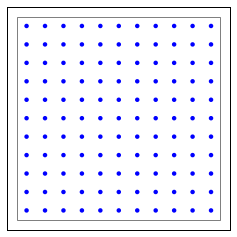

In [13]:
% matplotlib inline
import nest.topology as tp
import matplotlib.pyplot as plt

# create a layer
l = tp.CreateLayer({'rows'      : 11,
                    'columns'   : 11,
                    'extent'    : [11.0, 11.0],
                    'elements'  : 'iaf_psc_alpha'})

# plot layer with all its nodes
tp.PlotLayer(l)
plt.show()

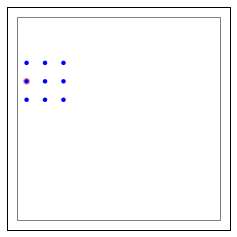

In [14]:
% matplotlib inline
import nest.topology as tp
import matplotlib.pyplot as plt
import nest
nest.ResetKernel()

# create a layer
l = tp.CreateLayer({'rows'      : 11,
                    'columns'   : 11,
                    'extent'    : [11.0, 11.0],
                    'elements'  : 'iaf_psc_alpha'})

# connectivity specifications with a mask
conndict = {'connection_type': 'divergent',
             'mask': {'rectangular': {'lower_left'  : [-2.0, -1.0],
                                      'upper_right' : [2.0, 1.0]}}}

# connect layer l with itself according to the given
# specifications
tp.ConnectLayers(l, l, conndict)

# plot the targets of the source neuron with GID 5
tp.PlotTargets([5], l)
plt.show()

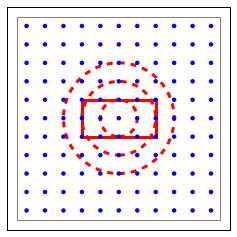

In [16]:
% matplotlib inline
import nest.topology as tp
import matplotlib.pyplot as plt
import nest

nest.ResetKernel()
# create a layer
l = tp.CreateLayer({'rows'      : 11,
                    'columns'   : 11,
                    'extent'    : [11.0, 11.0],
                    'elements'  : 'iaf_psc_alpha'})

# connectivity specifications
mask_dict = {'rectangular': {'lower_left'  : [-2.0, -1.0],
                             'upper_right' : [2.0, 1.0]}}
kernel_dict = {'gaussian': {'p_center' : 1.0,
                            'sigma'    : 1.0}}
conndict = {'connection_type': 'divergent',
            'mask'   : mask_dict,
            'kernel' : kernel_dict}

# connect layer l with itself according to the given
# specifications
tp.ConnectLayers(l, l, conndict)

# set up figure
fig, ax = plt.subplots()

# plot layer nodes
tp.PlotLayer(l, fig)

# choose center element of the layer as source node
ctr_elem = tp.FindCenterElement(l)

# plot mask and kernel of the center element
tp.PlotKernel(ax, ctr_elem, mask=mask_dict, kern=kernel_dict)